# Data Visualization

Data visualization is an important part of data science, it allows us to explore our data, as well as present our findings to others. There are many python libraries that allow you to create beautiful plots. Today we will only look a the `.plot()` function that's built in to pandas. This function is super useful as it's very easy to use, and allows us to make very quick, basic plots, from which we can explore our data.

As always, let's start by loading some data. We will start with the small `people_csv`, so that it's easier to understand what's going on:

In [ ]:
import pandas as pd

url = 'https://drive.google.com/file/d/15s7M2QllSR1GyNWM8RgcgabK-4hlMgpk/view?usp=sharing' # people.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
people = pd.read_csv(path)

# show dataframe
people

,name,age,country,sibilings,favourite_color,credit
0,Erika Schumacher,22,DE,2,Red,100
1,Javi López,50,ES,5,Yellow,95
2,Maria Rovira,23,ES,4,Yellow,89
3,Ana Garamond,29,ES,1,Blue,88
4,Shekhar Biswas,44,IN,3,Red,89
5,Muriel Adams,30,DE,2,Yellow,100
6,Saira Polom,25,IN,1,Blue,97
7,Alex Edwin,71,UK,7,Blue,88
8,Kit Ching,35,UK,2,Red,98
9,Dog Woof,2,XX,9,Gray,99


In this notebook we will show you a couple of quick ways to make plots without leaving the pandas module:
1. plotting 1 variable (1 column of the DataFrame)
2. plotting 2 or more variables (2 or more columns of the DataFrame)

## 1.&nbsp;  Plotting 1 variable

Pandas `.hist()` and `.plot()` methods are incredibly convenient, and more than enough when you are visualizing data for yourself, as part of the exploration process.

A histogram is a representation of the distribution of numerical data. Let's remind ourselves of how a histogram looks:

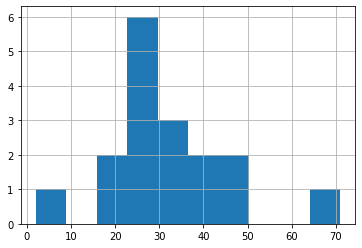

In [ ]:
# histogram of the age column
people.age.hist();

From the histogram above we can see that most of the people in our DataFrame are in their late 20s. We can also see that we have just one person under 10 years of age, and one person over 60.

Pandas plotting is limited in terms of tweaking/customizing the plot, but you can still change some basic stuff, like the number of bins in a histogram or the figure size:

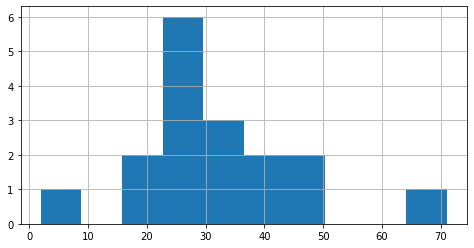

In [ ]:
# bins are the amount of coulmns the histogram is divided into. The more bins, the finer the detail that can be seen
# try changing the number of bins and running this cell again, how has the histogram changed?

# why not try also changing the figsize numbers one at a time and running the cell again, what changed?

people.age.hist(bins=10, figsize=(8,4));

For simple frequency plots, which show us how many values are in each category:

1. You should first group the categories and generate the frequencies with `value_counts()`

2. You should use a **bar plot** not a histogram as we're now using categorical data, not numerical
  - Numerical data - histogram
  - Categorical data - bar plot

Let's see this in action:

In [ ]:
# 1. group the categories and generate the frequencies with value_counts()
color_freq = people.favourite_color.value_counts()
color_freq

Blue      6
Red       5
Yellow    4
Gray      1
Orange    1
Name: favourite_color, dtype: int64

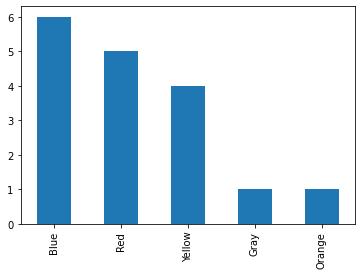

In [ ]:
# 2. plot our value_counts from above as a bar plot
color_freq.plot.bar();

Similar to the `.hist()`, there are some parameters available in `.plot()` that you can use to improve your plots, such as color or size. The documentation is always the ultimate source of truth when it comes to understanding which parameters you can tweak and how to do it:

- [These are the docs specifically for `DataFrame.plot.bar()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)
- [Here are the docs for `DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot), with arguments that apply to all types of plots, not just bar plots.

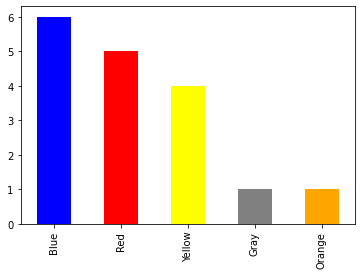

In [ ]:
# changing the colors of the bars
color_freq.plot.bar(color=["blue", "red", "yellow", "gray", "orange"]);

###### **Exercise 1:**
Make a bar plot for the countries where people are from. Highlight India (IN) in a brighter color.
> Tip: if you want to use prettier colors, you'll find some [here](https://matplotlib.org/stable/gallery/color/named_colors.html)



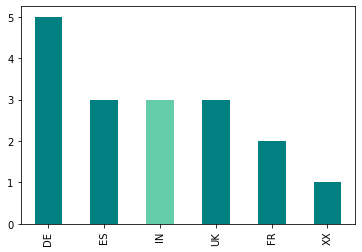

In [ ]:
# Agata

country_count = people.country.value_counts()
country_count.plot.bar(color=["teal", "teal", "mediumaquamarine", "teal", "teal"]);

## 2.&nbsp; Plotting 2 or more variables

Whenever you want to see if there is a relationship between two numerical variables, you could compute something complicated like a linear correlation coefficient or perform more sophisticated statistical tests, but nothing beats a good scatter plot:

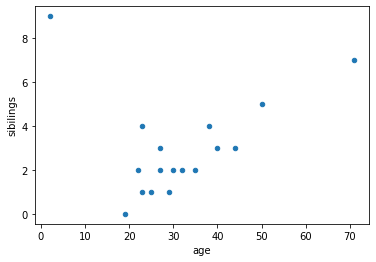

In [ ]:
people.plot.scatter(x="age", y="sibilings");

Scatter plots allow us to quickly see a strong/weak correlation at a glance. You can see a slight trend in the above scatter plot, showing that, on the whole, older people tend to have more siblings than younger one's.

Let's tweak some of the scatter plots parameters: 

- The `c` argument allows **colors** to depend on the values of another (numerical) column.
- The `cmap` argument allows the usage of "**color maps**" to fill the dots. See all available cmaps [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
- The `s` argument modifies the **size of the dots**.
- The `figsize` argument defines the **size of the whole plot**.
- The `sharex` argument allows us to specify that the legend for the colors and the x axis of the scatterplot should not **share the axis** (it's a bit annoying that this is not the default... welcome to the world of plotting with code!)



  > **Note:** Some of these options might only be available if you have one of the latest Pandas versions, as `pandas.plot()` is one of the areas where pandas is growing. You can check your pandas version with `pd.__version__` in the notebook. If your version is substantially older than the one shown in [here](https://pandas.pydata.org/docs/index.html), consider updating pandas by typing on your Terminal `pip install --upgrade pandas`.



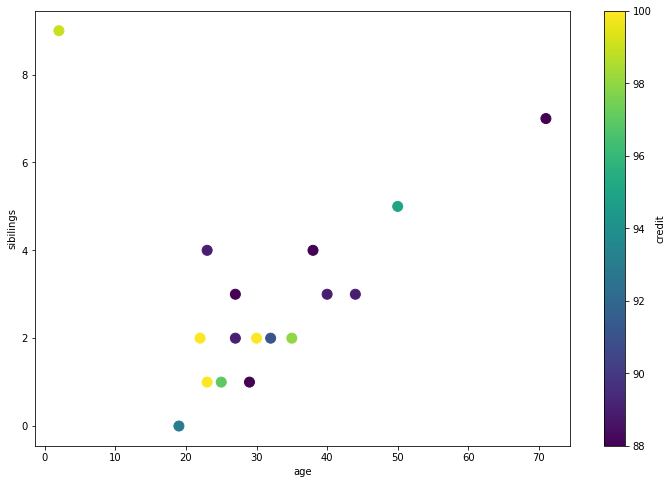

In [ ]:
# This is the same scatter plot as above, just bigger, more colorful, and now with an added third variable 'credit'.
people.plot.scatter(x="age", 
                    y="sibilings", 
                    c="credit",
                    s=100,
                    cmap="viridis",
                    figsize=(12,8),
                    sharex=False
                   );

## 3.&nbsp; Challenges:
Use the `vehicles.csv` dataset to create the plots in the following exercises.

In [ ]:
url = 'https://drive.google.com/file/d/18zYGrzRhn_mz1HJLXxSO_MwR0_nWBS3K/view?usp=sharing' # vehicles.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
cars = pd.read_csv(path)

#Add a column that states if a car's transmission is automatic or manual:
# cars["Auto"] = cars["Transmission"].str.contains("Automatic")

In [ ]:
cars.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [ ]:
cars["Auto"] = cars["Transmission"].str.contains("Auto")

In [ ]:
cars.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,Auto
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950,True
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,True
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100,True
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550,True
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550,True


###### **Exercise 2:**
how many cars have Automatic or Manual transmission?

As we are only plotting 1 variable, please feel free to check out the section above `Plotting 1 variable`



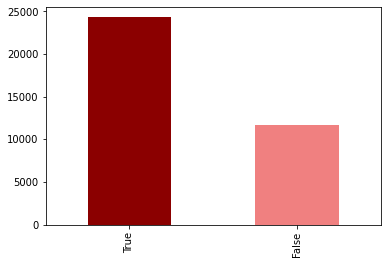

In [ ]:
# Subin

cars_transmission = cars.Auto.value_counts()
cars_transmission.plot.bar(color=["darkred", "lightcoral"]);

###### **Exercise 3:**
how many cars have each type of Drivetrain? Highlight "All-Wheel Drive" in a different color to everything else

In [ ]:
cars.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year', 'Auto'],
      dtype='object')

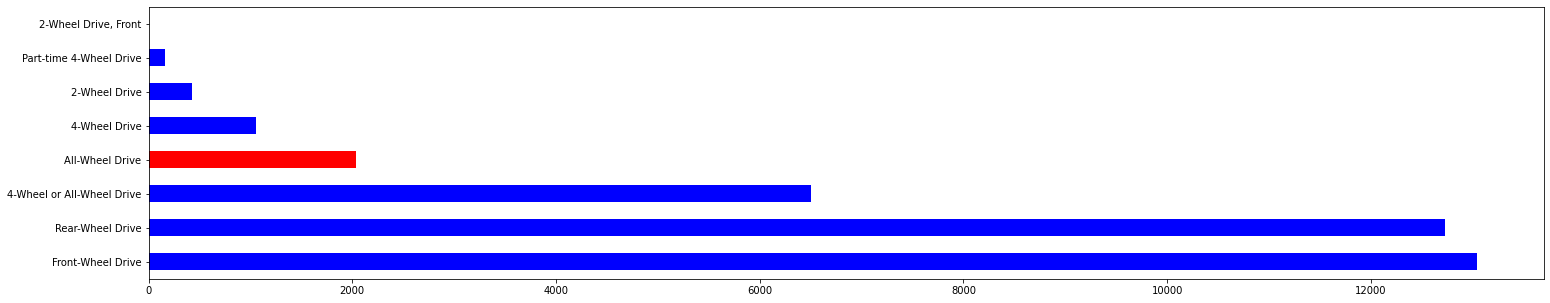

In [ ]:
# Andreas

cars.Drivetrain.value_counts().plot.barh(figsize=(25,5),color=['blue','blue','blue','red']);

###### **Exercise 4:**
represent the relationship between fuel consumption (`Combined MPG`) and the number of `Cylinders` a car has, using a scatterplot:

  > **Tip**: we went through scatter plots in the section above `Plotting 2 or more variables`


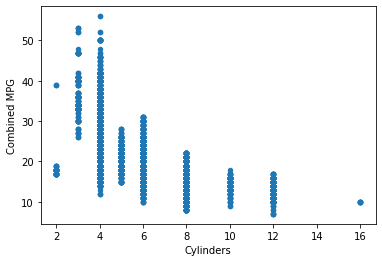

In [ ]:
# David

cars.plot.scatter(x="Cylinders", y="Combined MPG");

###### **Exercise 5:**
explore the same relationship as in exercise 4, but this time use a [boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html):

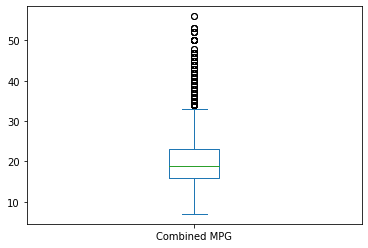

In [ ]:
# Bharati

cars.plot.box(x="Cylinders", y="Combined MPG");

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


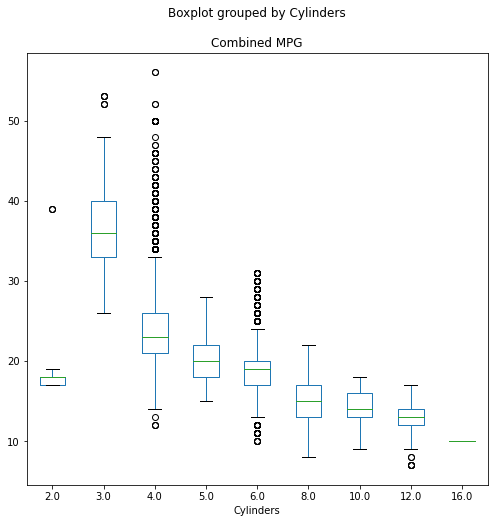

In [ ]:
# WBS

cars.boxplot(column="Combined MPG",
             by="Cylinders",
             figsize=(8, 8),
             grid=False);

###### **Exercise 6:**
create a plot that displays the evolution of the average CO2 emissions by cars over the years.
  > **Tip**: first you'll need to find the average CO2 per year, and then plot this



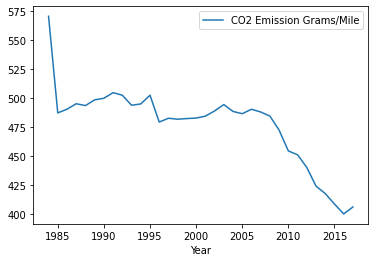

In [ ]:
# Therese

# calc average CO2 per row
avg_CO2 = cars.groupby("Year").agg({"CO2 Emission Grams/Mile":"mean"})
# display 
avg_CO2.plot();